# Import Libraries

In [27]:
import json
import csv
import ast
import pandas as pd 
import re
from datetime import date, datetime
import time
import numpy as np
import nltk
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
%matplotlib inline

# Import File

In [28]:
df_clean = pd.read_csv(r'../../../Data/Scrapping/Reddit/clean/dataframe_clean.csv')
df_clean_cat = pd.read_csv(r'../../../Data/Scrapping/Reddit/clean/dataframe_clean_cat.csv')

In [29]:
df_clean_cat

,text,author,date,score,category
0,kudos to sanhe construction for transporting i...,['pfnwl5'],01/09/2021,2014,bus
1,no evidence yet of covid-19 clusters at bus in...,['pgxwkm'],03/09/2021,85,bus
2,smrt bus with its logo removed ahead of handov...,['pfix5b'],01/09/2021,250,bus
3,120 bus drivers from 7 interchanges infected w...,['pee7pg'],30/08/2021,81,bus
4,"pedestrian dies, bus driver arrested in ang mo...",['pb3gdw'],25/08/2021,125,bus
...,...,...,...,...,...
14595,difficult manual transmission to use until you...,['Calikura'],04/07/2019,3,car rental
14596,temporary hdb parking? (rental car),['jrkywf'],10/11/2020,1,car rental
14597,nothing wrong with an entrepreneur hawking his...,['averagechou'],22/06/2021,13,car rental
14598,is your family expecting you to drive etc? sou...,['wyldmint'],27/12/2020,1,car rental


# Exploratory Data Analysis (EDA)

The following are the EDA used:
1. Number of post for each list
2. Top 10 most base on score

# Filter the dates by before covid and after covid  

## Create a function for date filter 

In [30]:
def before_covid(df):
  df_new = pd.DataFrame()
  t = []
  id = []
  d = []
  s = []
  cat = []
    
  for i in range(len(df['text'])):
    if datetime.strptime(df['date'].iloc[i], "%d/%m/%Y") < datetime.strptime("01/01/2020", "%d/%m/%Y"):
      t.append(df['text'].iloc[i])
      id.append(df['author'].iloc[i])
      d.append(df['date'].iloc[i])
      s.append(df['score'].iloc[i])
      cat.append(df['category'].iloc[i])

  df_new['text'] = t
  df_new['author'] = id
  df_new['date'] = d
  df_new['score'] = s
  df_new['category'] = cat        

    
  return df_new

In [31]:
def after_covid(df):

  df_new = pd.DataFrame()
  t = []
  id = []
  d = []
  s = []
  cat = []
    
  for i in range(len(df['text'])):
    if datetime.strptime(df['date'].iloc[i], "%d/%m/%Y") > datetime.strptime("31/12/2019", "%d/%m/%Y"):
      t.append(df['text'].iloc[i])
      id.append(df['author'].iloc[i])
      d.append(df['date'].iloc[i])
      s.append(df['score'].iloc[i])
      cat.append(df['category'].iloc[i])

  df_new['text'] = t
  df_new['author'] = id
  df_new['date'] = d
  df_new['score'] = s
  df_new['category'] = cat
  
  return df_new

In [32]:
df_clean_cat_bcovid =  before_covid(df_clean_cat)
df_clean_cat_acovid =  after_covid(df_clean_cat)

In [33]:
df_clean_cat_acovid

,text,author,date,score,category
0,kudos to sanhe construction for transporting i...,['pfnwl5'],01/09/2021,2014,bus
1,no evidence yet of covid-19 clusters at bus in...,['pgxwkm'],03/09/2021,85,bus
2,smrt bus with its logo removed ahead of handov...,['pfix5b'],01/09/2021,250,bus
3,120 bus drivers from 7 interchanges infected w...,['pee7pg'],30/08/2021,81,bus
4,"pedestrian dies, bus driver arrested in ang mo...",['pb3gdw'],25/08/2021,125,bus
...,...,...,...,...,...
10291,rental cars are the fastest cars.,['DragonCalypso'],14/06/2021,27,car rental
10292,blue car parked in a reserved parking lot for ...,['sageadam'],22/02/2020,48,car rental
10293,temporary hdb parking? (rental car),['jrkywf'],10/11/2020,1,car rental
10294,nothing wrong with an entrepreneur hawking his...,['averagechou'],22/06/2021,13,car rental


## 1. Post Frequency for Each Group

The following bar graph shows the number of post each group has. It gives an idea of the number of conversations the public has with regards to the specific topics. 

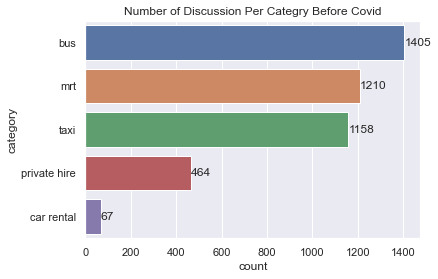

In [34]:
sns.set_theme(style = 'darkgrid')
ax = sns.countplot(y = 'category', data = df_clean_cat_bcovid)
ax.set_title('Number of Discussion Per Categry Before Covid')

for container in ax.containers:
    ax.bar_label(container)

In [35]:
df_clean_cat_bcovid_table = df_clean_cat_bcovid.groupby('category').size()
df_clean_cat_bcovid_table = pd.DataFrame(df_clean_cat_bcovid_table)
df_clean_cat_bcovid_table.reset_index(level=['category'])

,category,0
0,bus,1405
1,car rental,67
2,mrt,1210
3,private hire,464
4,taxi,1158


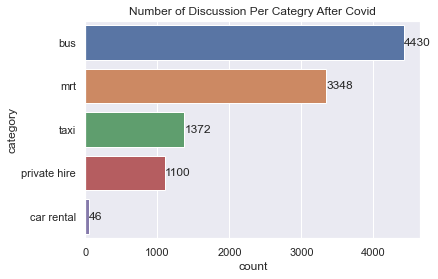

In [36]:
sns.set_theme(style = 'darkgrid')
ax = sns.countplot(y = 'category', data = df_clean_cat_acovid)
ax.set_title('Number of Discussion Per Categry After Covid')

for container in ax.containers:
    ax.bar_label(container)


In [37]:
df_clean_cat_acovid_table = df_clean_cat_acovid.groupby('category').size()
df_clean_cat_acovid_table = pd.DataFrame(df_clean_cat_acovid_table)
df_clean_cat_acovid_table.reset_index(level=['category'])

,category,0
0,bus,4430
1,car rental,46
2,mrt,3348
3,private hire,1100
4,taxi,1372


## 2. Preview The Top 10 Post for Each Group

To give a rough idea of what are some of the conversations happening for each topic, we will print out the top 10 post by scores.

# 2.1 Preview the Top 10 Post Before Covid

In [38]:
df_clean_cat_bcovid.sort_values(['category', 'score'], ascending = False, inplace = True)
df_clean_cat_acovid.sort_values(['category','score'], ascending = False, inplace = True)

In [39]:
cat = df_clean_cat_bcovid['category'].unique().tolist()

In [40]:
for c in cat:
    print(f'=======================Top 10 Discussion for {c} Before Covid=======================')
    for t in df_clean_cat_bcovid['text'][df_clean_cat_bcovid['category'] == c].head(10).tolist():
        print(t)

=======================Top 10 Discussion for taxi Before Covid=======================
i understand some people here seem to miss the old taxis, found this picture i took 6 years ago
so on my way back home, my taxi broke down, i walked the highway, and a random uncle offered to send me back! :')
taxi touting at ion orchard
23yo edgelord throws $1000 in taxi driver's face and proceeds to insult police officer
kathy was a ‘people person’, loved by many: family, friends of nus undergrad who died in clementi taxi accident
self administered surge pricing. please flag to lta, there were taxis touting at clark quay a while back and lta revoke their licenses.
taxi service on ubin
nissan cedric taxi circa 2008.
sounds like complete bullshit. 1) no singaporean taxi driver wouldnt just shut up and drive when they're offered 50x the fare 2) 999 will not bother explaining whether grab is a contract or not, their aim is to dispatch someone and get time wasting idiots like him off the phone so someone

In [41]:
for c in cat:
    print(f'=======================Top 10 Discussion for {c} Before Covid=======================')
    for t in df_clean_cat_acovid['text'][df_clean_cat_acovid['category'] == c].head(10).tolist():
        print(t)

=======================Top 10 Discussion for taxi Before Covid=======================
a old photo of crown taxis stacked up against one another for scrap
new cabinet announcement
taxi as wedding car
taxi driver's armpit sweat output 1000%
in 1997,toyota’s crown comfort was bought as taxis for hong kong and singapore and came to our shores in late 97 and had been serving till 2014.whether it’s a quick stroll to buy supplies or a few from distant land,growing up in the 2000s made this childhood favourites
taxi billboards. i just realised they disappeared. who remembers when and why?
s'pore boy, 15, takes father's taxi out for joyride with 2 friends aged 14 & 15, crashes into building
bringing up the rear of the mobile column, the unsung heroes of cb! taxi driver and food delivery specialists!
taking the opportunity to give this psa: the comfort taxi app is actually pretty decent. the interface has significantly improved in the past year or so. they have also expanded to allow phv drivers

## 3. Visualize Wordcloud of topics

In [42]:
def word_cloud(data, stopword, cat):

    message = data['text'][data['category'] == cat].tolist()

    text = " ".join(list(message))

    wc = WordCloud(stopwords = stopword, background_color='white').generate(text)

    print(f"========================{cat}========================")
    plt.imshow(wc, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()
    print('\n')

In [49]:
def df_no_stopwords(data, stopwords, cat):
    output = []
    
    for text in data['text'][data['category'] == cat]:
        s_text = text.split()
        result_text = [word for word in s_text if word.lower() not in stopwords]
        result = ' '.join(result_text)
        output.append(result)

    output_df = pd.DataFrame(output)

    return output_df

In [44]:
stopwords = set(STOPWORDS)
stopwords.update(['mrt', 'station', 'see', 'bus', 'buses', 'line', 'account', 'one', 'full',
                  'get', 'min', 'class', 'year', 'pm', '', 'take', 'taxi', 'allow', 'last', 'almost',
                  'post', 'start', 'cross', 'car_rental', 'comfortdelgro', 'singapore', 'grab',
                  'night', 'find', 'need', 'build', 'photo', 'video', 'leave', 'car', 'train', 
                  'think', 'food', 'make', 'set', 'fresh', 'sbs', 'driver', 'delgro', 'comfort',  
                  'move',  'ever', 'blue', 'uber', 'go', 'look', 'use', 'also', 'give', 
                  'many', 'come', 'lot', 'seem', 'guess', 'definitely', 'sure', 'keep', 'much', 'already', 
                  'do', 'lol', 'people', 'well', 'back', 'week', 'u', 'want', 'day', 'will', 'know', 
                  'even', 'really', 'said', 'say', 'cab', 'public transport', 'taxis', 'public', 
                  'transport', 'thing', 'still', 'got', 'now', 's', 'stop', 'around', 'another', 'stations',
                  'smrt', 'next', 'us', 'may', 'person', 'years', 'going', 'trains', 'way', 'etc', 'makes',
                  'seat', 'guy', 'https', 'always', 'riders', 'cabbie', 'sg', 'drivers', 'auntie', 'man', 
                  'uncle', 'stops', 'someone', 'something', 'andy', 'cabs', 'cabbies', 'order', 'delivery', 
                  'gojek', 'quite','fucking', 'every', 'getting', 'trying', 'told', 'something', 'singaporean', 
                  'feel', 'lta', 'fuck', 'without', 'let', 'made', 'getting', 'passenger', 'restaurant', 'grabfood', 'door', 
                  'merchant', 'don', 't', 'customer', 'cars', 'actually', 'senior', 'entrepreneur', 'rental', 'cars', 'current'])


In [50]:
df_no_stopwords(df_clean_cat_bcovid, stopwords, 'bus')

,0
0,confession petty rider
1,prc missed demands u-turn blocking
2,1. phone 2. throw bushes 3. goes 4. drive 5. p...
3,big banana
4,sentence reeks self-entitlement. everything he...
...,...
1400,"anxious lady foreign land. said, able late hou..."
1401,yale nus girls chio general compared nus. mayb...
1402,help what? everyone clearly rid holding bus. n...
1403,"no, meant general... large number china?"


# 3.1 Wordcloud Before Covid

========================bus========================


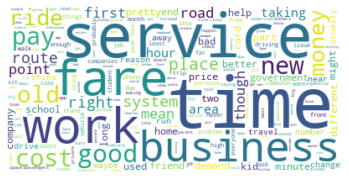

In [51]:
word_cloud(df_clean_cat_bcovid, stopwords, 'bus')

========================mrt========================


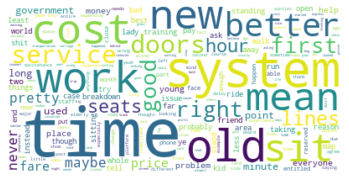

In [52]:
word_cloud(df_clean_cat_bcovid, stopwords, 'mrt')

========================taxi========================


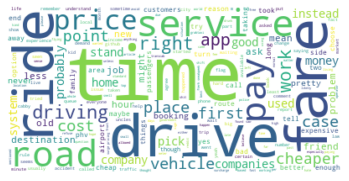

In [53]:
word_cloud(df_clean_cat_bcovid, stopwords, 'taxi')

========================private hire========================


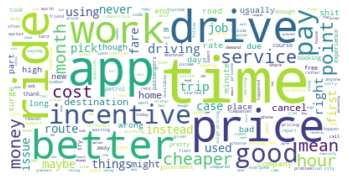

In [54]:
word_cloud(df_clean_cat_bcovid, stopwords, 'private hire')

========================car rental========================


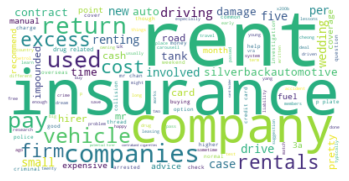

In [55]:
word_cloud(df_clean_cat_bcovid, stopwords, 'car rental')

# 3.1 Wordcloud After Covid

========================bus========================


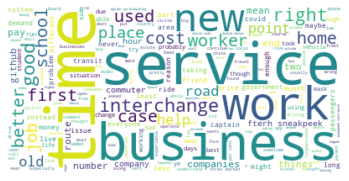

In [56]:
word_cloud(df_clean_cat_acovid, stopwords, 'bus')

========================mrt========================


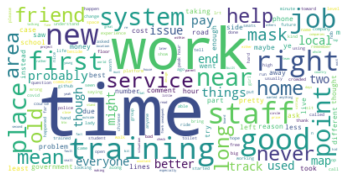

In [57]:
word_cloud(df_clean_cat_acovid, stopwords, 'mrt')

========================taxi========================


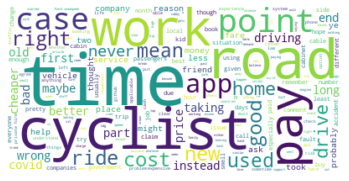

In [58]:
word_cloud(df_clean_cat_acovid, stopwords, 'taxi')

========================private hire========================


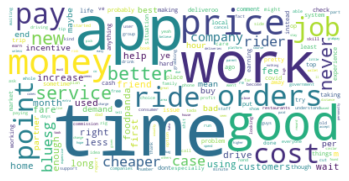

In [59]:
word_cloud(df_clean_cat_acovid, stopwords, 'private hire')

========================car rental========================


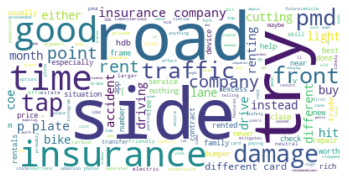

In [60]:
word_cloud(df_clean_cat_acovid, stopwords, 'car rental')

# Export Cleaned Dataframe

In [61]:
df_clean_cat_bcovid.to_csv(r'../../../Data/Scrapping/Reddit/eda/df_clean_cat_bcovid.csv', index = False)
df_clean_cat_acovid.to_csv(r'../../../Data/Scrapping/Reddit/eda/df_clean_cat_acovid.csv', index = False)

# Export data used for dataframe

In [62]:
# export_wc_bus_bcovid = df_no_stopwords(df_clean_cat_bcovid, stopwords, 'bus')
# export_wc_mrt_bcovid = df_no_stopwords(df_clean_cat_bcovid, stopwords, 'mrt')
# export_wc_taxi_bcovid = df_no_stopwords(df_clean_cat_bcovid, stopwords, 'taxi')
# export_wc_privatehire_bcovid = df_no_stopwords(df_clean_cat_bcovid, stopwords, 'private hire')
# export_wc_crental_bcovid = df_no_stopwords(df_clean_cat_bcovid, stopwords, 'car rental')

# export_wc_bus_acovid = df_no_stopwords(df_clean_cat_acovid, stopwords, 'bus')
# export_wc_mrt_acovid = df_no_stopwords(df_clean_cat_acovid, stopwords, 'mrt')
# export_wc_taxi_acovid = df_no_stopwords(df_clean_cat_acovid, stopwords, 'taxi')
# export_wc_privatehire_acovid = df_no_stopwords(df_clean_cat_acovid, stopwords, 'private hire')
# export_wc_crental_acovid = df_no_stopwords(df_clean_cat_acovid, stopwords, 'car rental')

In [64]:
# export_wc_bus_bcovid.to_csv(r'../../../Data/Scrapping/Reddit/dashboard data/export_wc_bus_bcovid.csv', index = False)
# export_wc_mrt_bcovid.to_csv(r'../../../Data/Scrapping/Reddit/dashboard data/export_wc_mrt_bcovid.csv', index = False)
# export_wc_taxi_bcovid.to_csv(r'../../../Data/Scrapping/Reddit/dashboard data/export_wc_taxi_bcovid.csv', index = False)
# export_wc_privatehire_bcovid.to_csv(r'../../../Data/Scrapping/Reddit/dashboard data/export_wc_privatehire_bcovid.csv', index = False)
# export_wc_crental_bcovid.to_csv(r'../../../Data/Scrapping/Reddit/dashboard data/export_wc_crental_bcovid.csv', index = False)

# export_wc_bus_acovid.to_csv(r'../../../Data/Scrapping/Reddit/dashboard data/export_wc_bus_acovid.csv', index = False)
# export_wc_mrt_acovid.to_csv(r'../../../Data/Scrapping/Reddit/dashboard data/export_wc_mrt_acovid.csv', index = False)
# export_wc_taxi_acovid.to_csv(r'../../../Data/Scrapping/Reddit/dashboard data/export_wc_taxi_acovid.csv', index = False)
# export_wc_privatehire_acovid.to_csv(r'../../../Data/Scrapping/Reddit/dashboard data/export_wc_privatehire_acovid.csv', index = False)
# export_wc_crental_acovid.to_csv(r'../../../Data/Scrapping/Reddit/dashboard data/export_wc_crental_acovid.csv', index = False)

In [65]:
df_clean_cat_bcovid_table.to_csv(r'../../../Data/Scrapping/Reddit/dashboard data/df_clean_cat_bcovid_table.csv', index = False)
df_clean_cat_acovid_table.to_csv(r'../../../Data/Scrapping/Reddit/dashboard data/df_clean_cat_acovid_table.csv', index = False)